In [13]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz 

# 데이터 경로
file_path = "/gdrive/MyDrive/colab/dt/PlayTennis.csv"
# 데이터 경로로부터 파일을 읽음 (pandas 라이브러리 사용)
datas = pd.read_csv(file_path) #csv에서 저장해서 읽음

# 데이터 출력 (데이터 형태 확인)
print(datas)

     outlook  temp humidity  windy  day      time play
0      sunny   hot     high  False  Mon  14-38-53   no
1      sunny   hot     high   True  Tue  10-17-12   no
2   overcast   hot     high  False  Wed  09-27-42  yes
3      rainy  mild     high  False  Sat  18-23-53  yes
4      rainy  cool   normal  False  Sun  15-32-21  yes
5      rainy  cool   normal   True  Thu  07-53-17   no
6   overcast  cool   normal   True  Sat  17-31-28  yes
7      sunny  mild     high  False  Mon  21-48-22   no
8      sunny  cool   normal  False  Sun  11-24-32  yes
9      rainy  mild   normal  False  Sat  16-15-34  yes
10     sunny  mild   normal   True  Sun  19-32-43  yes
11  overcast  mild     high   True  Fri  22-00-14  yes
12  overcast   hot   normal  False  Sat  13-49-58  yes
13     rainy  mild     high   True  Tue  12-29-11   no


In [15]:
# 범주형 데이터를 수치형 데이터로 자동 변환해주는 라이브러리
label_encoder = LabelEncoder()

# 정답 클래스 이름 (yes, no)
target_names = label_encoder.fit(datas['play']).classes_
print("target_names : {}".format(target_names))

datas['outlook'] = label_encoder.fit_transform(datas['outlook'])
datas['temp'] = label_encoder.fit_transform(datas['temp'])
datas['humidity'] = label_encoder.fit_transform(datas['humidity'])
datas['windy'] = label_encoder.fit_transform(datas['windy'])
datas['play'] = label_encoder.fit_transform(datas['play'])

#요일을 평일과 주말로 나누어서 0과 1로 구분할 수 있도록 함
datas.loc[datas.day == 'Sat', ('day')] = 'weekend'
datas.loc[datas.day == 'Sun', ('day')] = 'weekend'
datas.loc[datas.day != 'weekend', ('day')] = 'weekday'

datas['day'] = label_encoder.fit_transform(datas['day'])

#continuous feature을 엔트로피 측정을 위해 discrete feature로 변환
#10:00 ~ 19:00 까지의 시간대는 good, 나머지는 bad
time = pd.DataFrame(datas.time.str.split('-', 2).tolist(), columns=['hour', 'min', 'sec'])
time = time.apply(pd.to_numeric)
time['name'] = 0
time.loc[time['hour'] <= 9, 'name'] = 'bad'
time.loc[ (time['hour'] >= 19) & (time['min'] != 0) & (time['sec'] != 0), 'name'] = 'bad'
time.loc[time['name'] != 'bad', 'name'] = 'good'

datas['time'] = time['name']

datas['time'] = label_encoder.fit_transform(datas['time'])

# 데이터 출력 (데이터 포맷 변환 후 결과 확인)
print(datas)

target_names : ['no' 'yes']
    outlook  temp  humidity  windy  day  time  play
0         2     1         0      0    0     1     0
1         2     1         0      1    0     1     0
2         0     1         0      0    0     0     1
3         1     2         0      0    1     1     1
4         1     0         1      0    1     1     1
5         1     0         1      1    0     0     0
6         0     0         1      1    1     1     1
7         2     2         0      0    0     0     0
8         2     0         1      0    1     1     1
9         1     2         1      0    1     1     1
10        2     2         1      1    1     0     1
11        0     2         0      1    0     1     1
12        0     1         1      0    1     1     1
13        1     2         0      1    0     1     0


In [16]:
# 입력 데이터와 정답 데이터로 분리
x_data, y_data = datas.drop(['play'], axis=1), datas['play'] #두번째 축을 기준으로 자름

# 분리 결과 확인
print(x_data)
print()
print(y_data)

    outlook  temp  humidity  windy  day  time
0         2     1         0      0    0     1
1         2     1         0      1    0     1
2         0     1         0      0    0     0
3         1     2         0      0    1     1
4         1     0         1      0    1     1
5         1     0         1      1    0     0
6         0     0         1      1    1     1
7         2     2         0      0    0     0
8         2     0         1      0    1     1
9         1     2         1      0    1     1
10        2     2         1      1    1     0
11        0     2         0      1    0     1
12        0     1         1      0    1     1
13        1     2         0      1    0     1

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64


In [17]:
# Decision tree 모델 학습 ()
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy') # entropy를 기준으로 tree를 구성
train_result = decision_tree.fit(x_data, y_data)

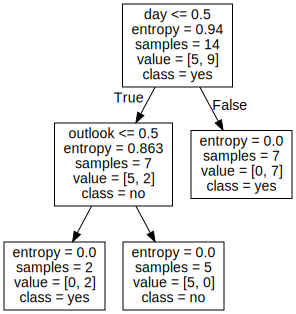

In [18]:
# 학습 결과 확인 (graphviz 라이브러리 사용)
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data.columns,
                                             class_names=target_names)) 
graph

In [19]:
# 학습한 모델을 사용하여 예측
predict_result = decision_tree.predict(x_data)

# 예측 결과 출력 (실제 정답을 맞춘 경우 True로 표시됨)
print(predict_result == y_data)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool
